# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


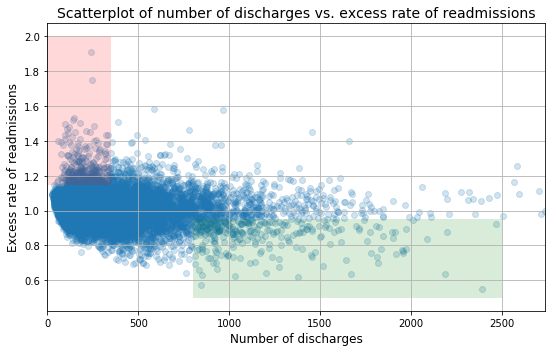

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

In [6]:
#make df with easier to use name
clean_hospital_read_df.head()


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [7]:
clean_hospital_read_df.shape

(11578, 12)

## A. Do you agree with the above analysis and recommendations? Why or why not?

Concerns about Part A:
    - Why were 0:80 and the last three rows exlcuded from the scatterplot?
Concerns about Part B:
    - The filters of n<100 and n>1000 seem arbitrary points to draw conclusions. Why were those numbers chosen?
    - The scatterplot does not highlight areas based on the <100 and >1000 cutoffs
Concerns about C:
    - Some very large hospitals also have high readmissions rates, how strong is the correlation?
    
## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
    1. Setup an appropriate hypothesis test. 
$H_0: r = 0$ There is no correlation between number of discharges and number of readmissions
    
    2. Compute and report the observed significance value (or p-value).
    3. Report statistical significance for  α = .01.

In [8]:
import scipy.stats as stats

def bootstrap_r_permutations(x,y,n):
    perm_array = np.empty(n)
    for i in range(n):
        perm_y = np.random.permutation(y)
        r, p = stats.pearsonr(x,perm_y)
        perm_array[i] = r
    return perm_array


#Drop excess columns for simplicity
df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']][81:]

#Calculate base R
base_r, p = stats.pearsonr(df['Number of Discharges'],df['Excess Readmission Ratio'])

#Bootstrap permutations of R
perm_r = bootstrap_r_permutations(df['Number of Discharges'],df['Excess Readmission Ratio'],10000)
#Calculate p value
p_value = np.sum(perm_r <= base_r) / len(perm_r)

print('Observed R: {}'.format(base_r))
print('Observed P Value:'.format(p))
print('Boostrap P Value: {}'.format(p_value))

Observed R: -0.09739794351079353
Observed P Value:
Boostrap P Value: 0.0


    4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
With a p value of 0, the observed R is statistically significant at the $\alpha$ = .01 level. However, with such a low value for R, the correlation between number of discharges and excess readmission ratio is fairly weak. From a practical standpoint, closing down or merging a large number of hospitals is difficult to justify and may cause more harm than good. The client should investigate other factors which may have stronger impacts on the excess readmission ratio.

    5. Look at the scatterplot above.
    6. What are the advantages and disadvantages of using this plot to convey information?
The scatterplot does a good job of giving a broad view of the majority of the datapoints and how features may be correlated. However, the red and green boxes highlight seemingly arbitrary points on the plot. 
    7. Construct another plot that conveys the same information in a more direct manner.

Regression Line : y = -2.856505294382517e-05x+1.0179475579544206
Observed R: -0.09309554287590441


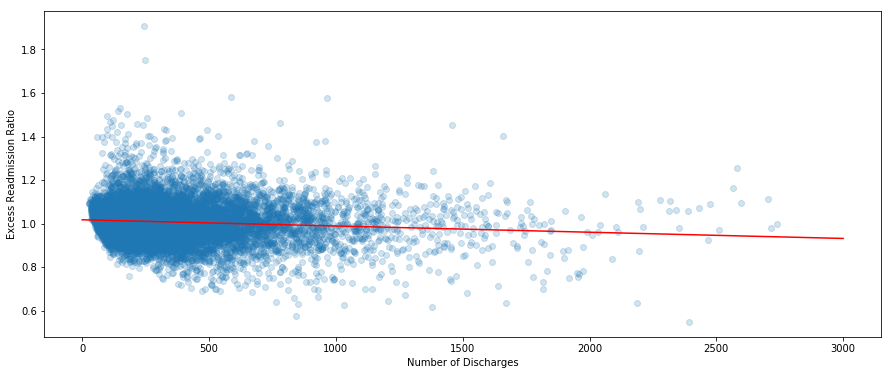

In [9]:
x = [a for a in df['Number of Discharges'][:-3]]
y = [a for a in df['Excess Readmission Ratio'][:-3]]

a, b = np.polyfit(x, y, 1) # First Order Polynomial

x1 = np.array([0, 3000])
y1 = a * x1 + b
plt.figure(figsize=[15,6])
plt.plot(x1, y1, color='red')
plt.scatter(x, y, alpha=0.2)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
print('Regression Line : y = {}x+{}'.format(a,b))
print('Observed R: {}'.format(stats.pearsonr(x,y)[0]))
plt.show()

This plot shows a trendline for the data to make it easier to discern an overall relationship between features. It also includes the R value and line equation so the viewer knows exactly what the numeric relationship is.